In [ ]:
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

full_data = np.load('/content/drive/MyDrive/Machine Learning Project/features gender 2.npy')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

data_1 = np.load('/content/drive/MyDrive/Machine Learning Project/features authentication 1.npy')
data_2 = np.load('/content/drive/MyDrive/Machine Learning Project/features authentication 2.npy')
data_3 = np.load('/content/drive/MyDrive/Machine Learning Project/features authentication 3.npy')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def normalizer(data):
  scaler = StandardScaler()
  data_normalized = scaler.fit_transform(data)
  return data_normalized

full_data = normalizer(full_data)

In [ ]:
data_1 = normalizer(data_1)
data_2 = normalizer(data_2)
data_3 = normalizer(data_3)


In [ ]:
print("Gender features shape:", full_data.shape)
print("Auth 1 features shape:", data_1.shape)
print("Auth 2 features shape:", data_2.shape)
print("Auth 3 features shape:", data_3.shape)

Gender features shape: (154552, 171)
Auth 1 features shape: (14838, 171)
Auth 2 features shape: (19138, 171)
Auth 3 features shape: (17229, 171)


## Gender Classification


### KMEANS

In [ ]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def clustering_with_kmeans(data, max_cluster=10):
  inertia = []
  silhouette = []
  pca = PCA(n_components=0.95)
  pca_data = pca.fit_transform(data)

  pca_data.shape
  for n_clusters in range(2, max_cluster + 1):
      print("number of clusters: ", n_clusters)
      kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
      clustered_kmeans = kmeans.fit_predict(pca_data)
      inertia.append(kmeans.inertia_)
      silhouette.append(silhouette_score(pca_data, clustered_kmeans))

      data_visualization = TSNE(n_components = 2).fit_transform(pca_data)
      plt.scatter(data_visualization[:, 0], data_visualization[:, 1], c=clustered_kmeans, cmap='tab10')
      plt.title(f"number of clusters: {n_clusters}")
      plt.show()

  plt.plot(range(2, max_cluster + 1), inertia, marker='o')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Inertia')
  plt.title('Elbow Method for Optimal k')
  plt.show()

  plt.plot(range(2, max_cluster + 1), silhouette, marker='o')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Silhouette Score')
  plt.title('Silhouette Score for Optimal k')
  plt.show()

In [ ]:

print("Feature Authentication 1: ")
clustering_with_kmeans(data_1)
print("Feature Authentication 2: ")
clustering_with_kmeans(data_2)


Output hidden; open in https://colab.research.google.com to view.

Feature Authentication 3: 
number of clusters:  2


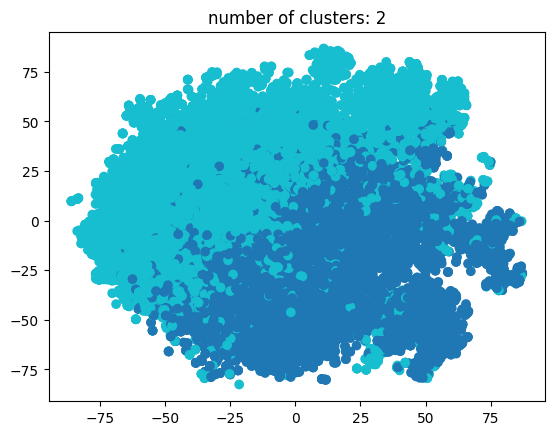

number of clusters:  3


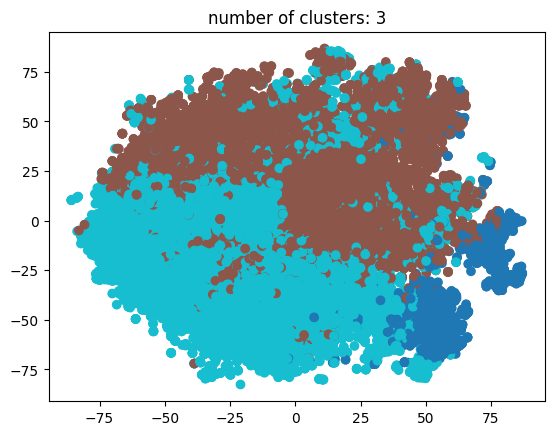

number of clusters:  4


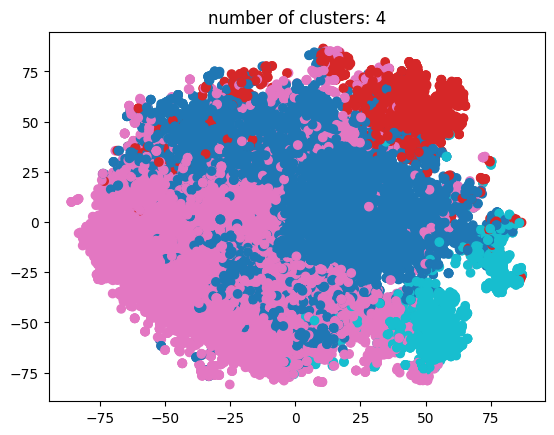

number of clusters:  5


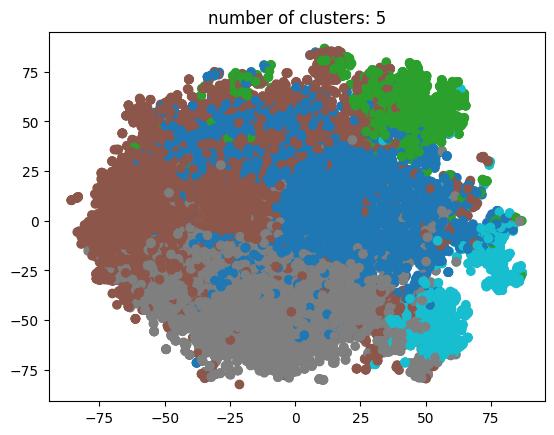

number of clusters:  6


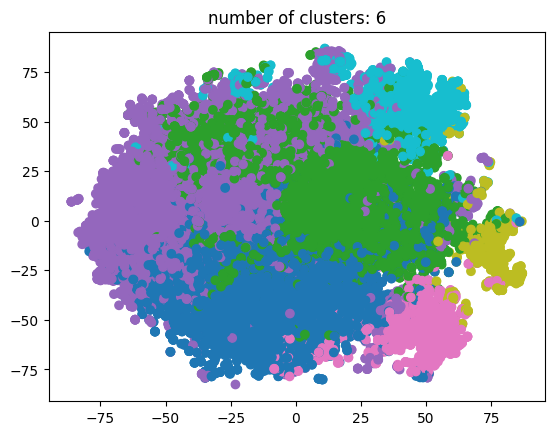

number of clusters:  7


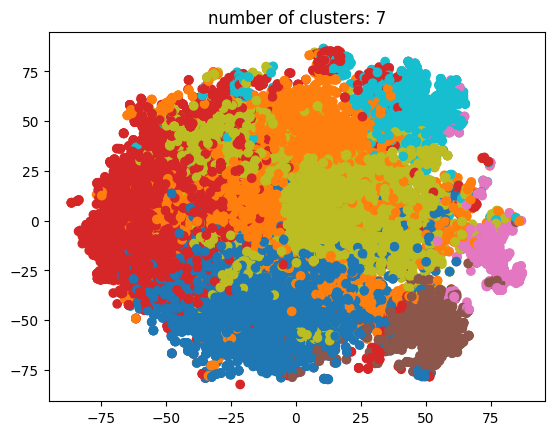

number of clusters:  8


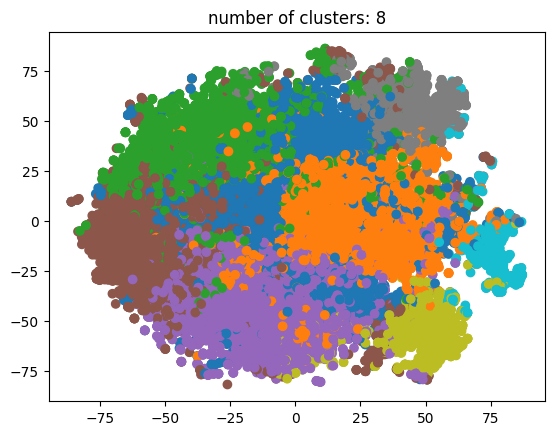

number of clusters:  9


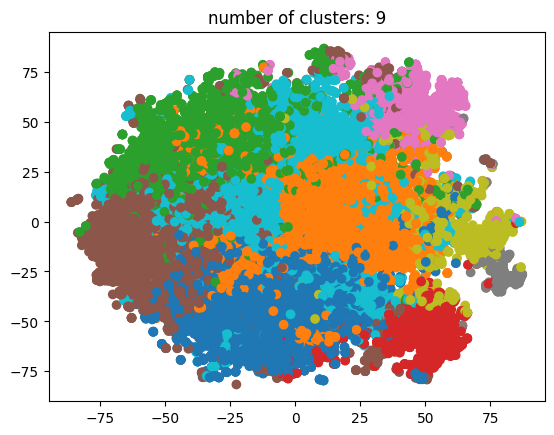

number of clusters:  10


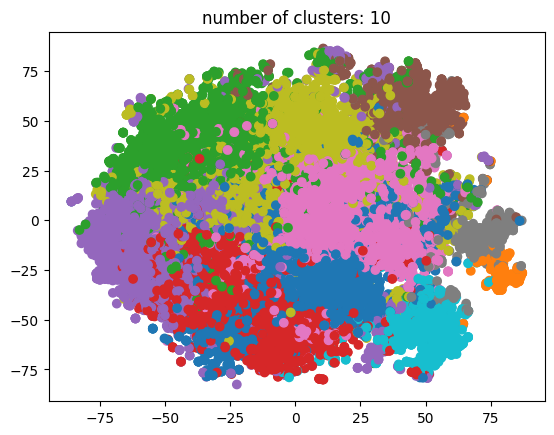

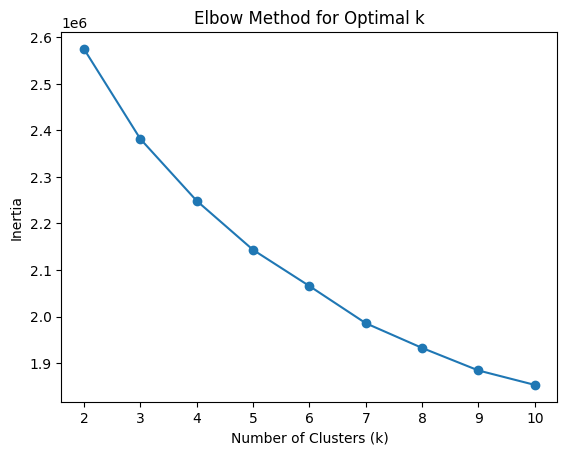

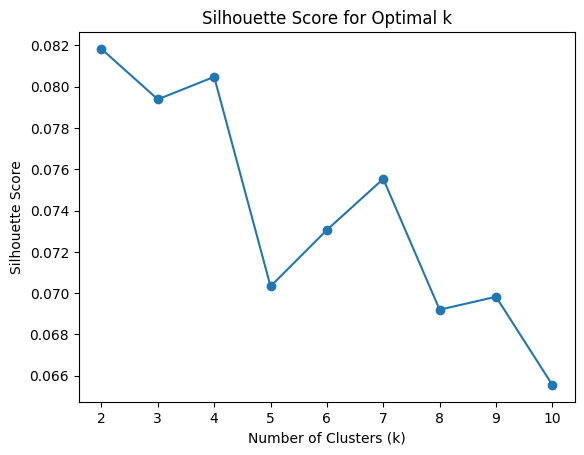

In [ ]:
print("Feature Authentication 3: ")
clustering_with_kmeans(data_3)

### Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

def clustering_with_hierarchical(data, max_cluster):
  inertia = []
  silhouette = []
  pca = PCA(n_components=0.95)
  pca_data = pca.fit_transform(data)

  pca_data.shape
  for n_clusters in range(2, max_cluster + 1):
      print("number of clusters: ", n_clusters)
      hierarchical = AgglomerativeClustering(n_clusters = n_clusters)
      clustered_hierarchical = hierarchical.fit_predict(pca_data)
      silhouette.append(silhouette_score(pca_data, clustered_hierarchical))

      data_visualization = TSNE(n_components = 2).fit_transform(pca_data)
      plt.scatter(data_visualization[:, 0], data_visualization[:, 1], c=clustered_hierarchical, cmap='tab10')
      plt.title(f"number of clusters: {n_clusters}")
      plt.show()

  plt.plot(range(2, max_cluster + 1), silhouette, marker='o')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Silhouette Score')
  plt.title('Silhouette Score for Optimal k')
  plt.show()


In [ ]:

print("Feature Authentication 1: ")
clustering_with_hierarchical(data_1)
print("Feature Authentication 2: ")
clustering_with_hierarchical(data_2)


Output hidden; open in https://colab.research.google.com to view.

Feature Authentication 3: 
number of clusters:  2


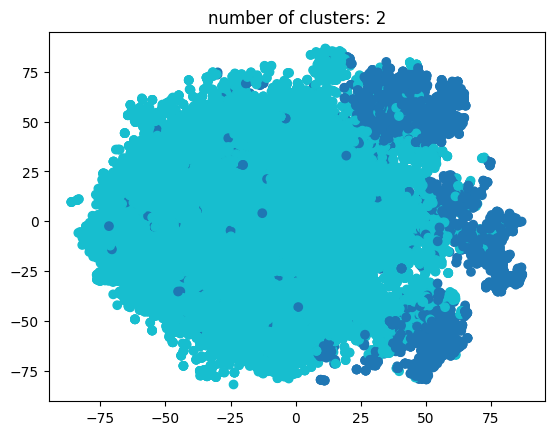

number of clusters:  3


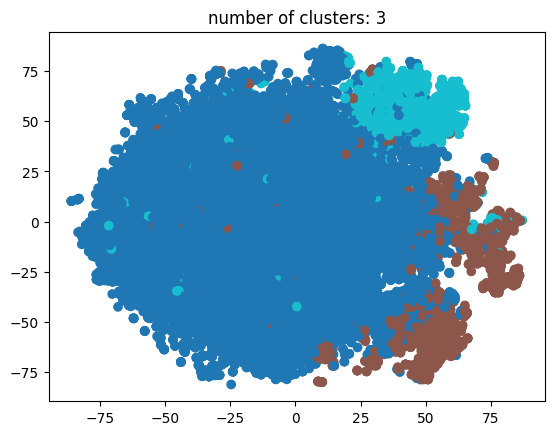

number of clusters:  4


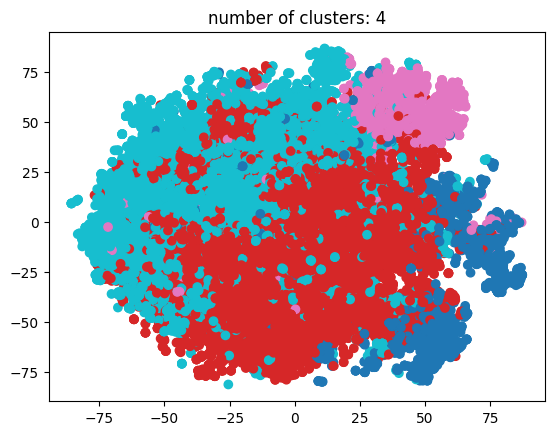

number of clusters:  5


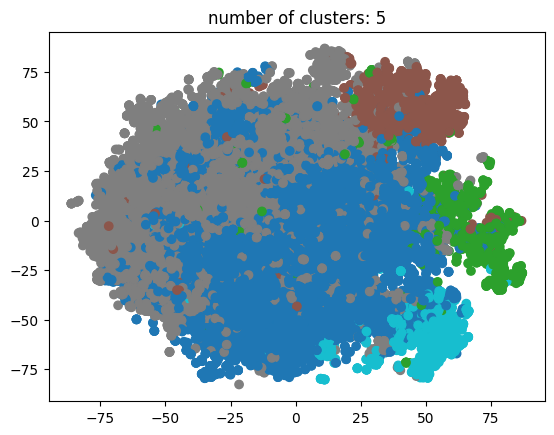

number of clusters:  6


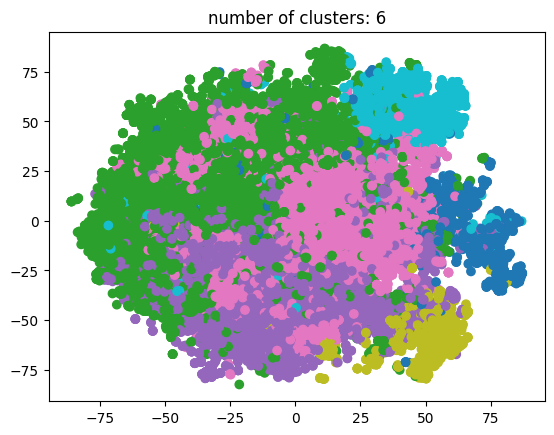

number of clusters:  7


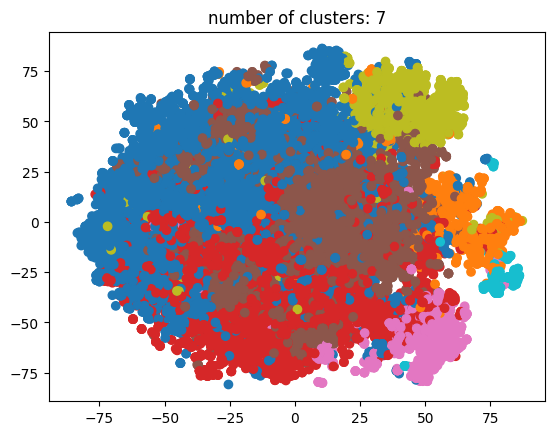

number of clusters:  8


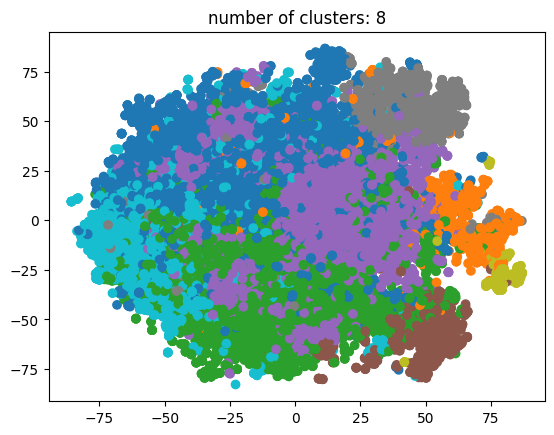

number of clusters:  9


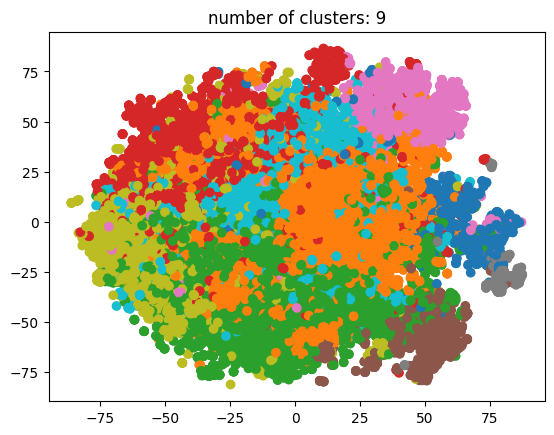

number of clusters:  10


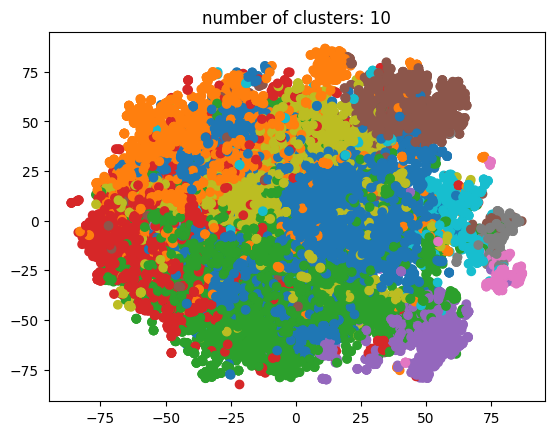

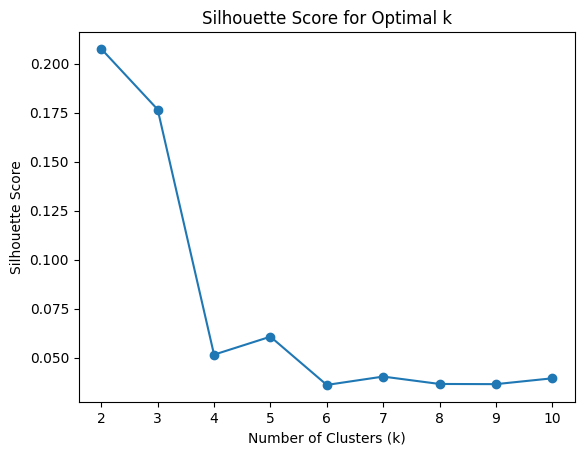

In [ ]:
print("Feature Authentication 3: ")
clustering_with_hierarchical(data_3)

## Gender Classification

number of clusters:  2


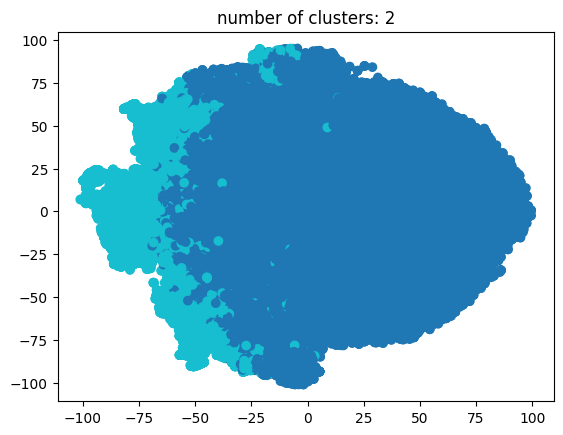

number of clusters:  3


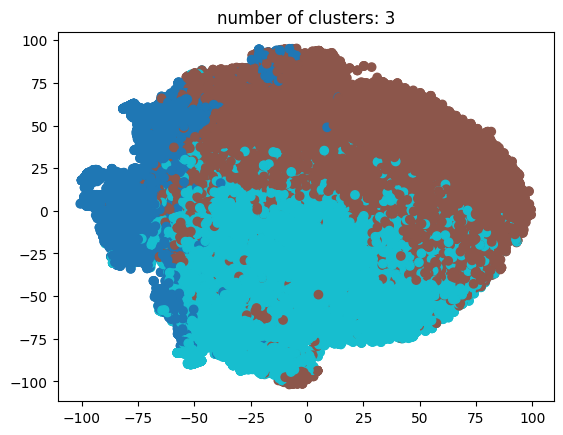

number of clusters:  4


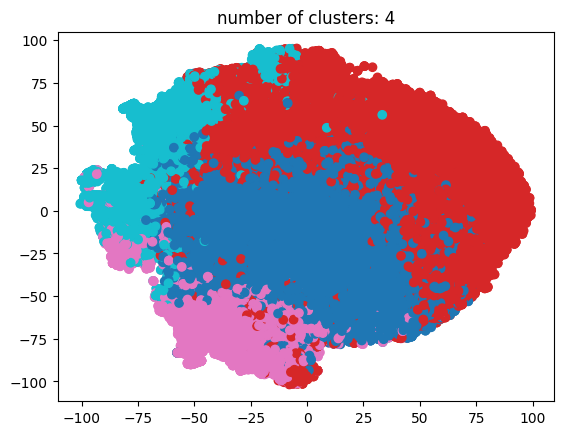

number of clusters:  5


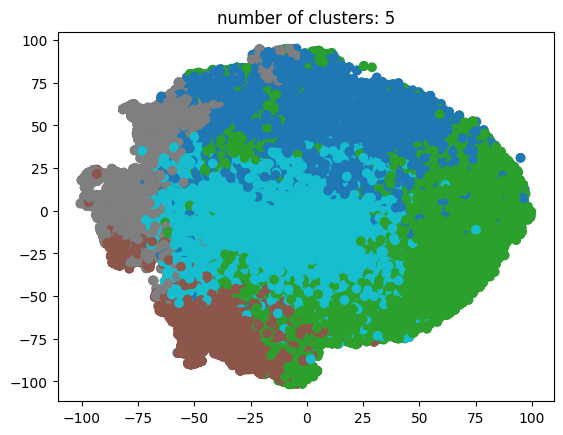

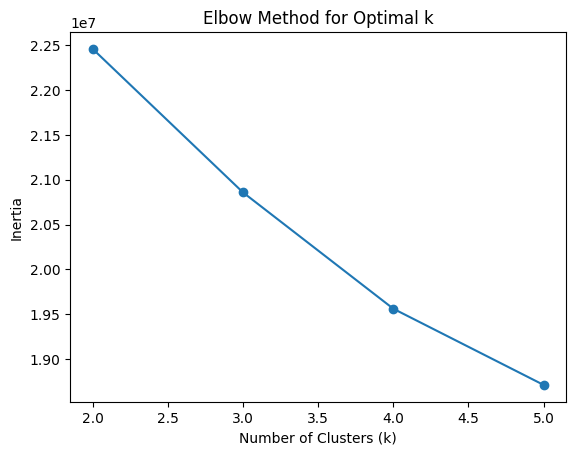

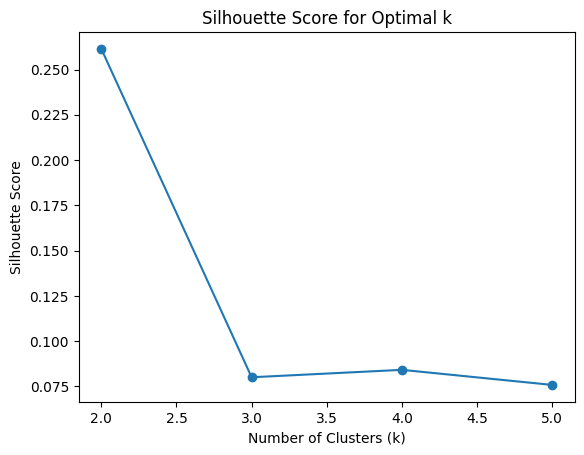

In [ ]:
clustering_with_kmeans(full_data, 5)